<a href="https://colab.research.google.com/github/shubhamgogri/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_html('https://github.com/shubhamgogri/Car-Price-Prediction/blob/main/car%20data.csv')
data = data[0]
data.head()

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,NaN,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,NaN,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,NaN,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,NaN,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,NaN,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.drop('Unnamed: 0', inplace = True, axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
for feature in data.columns:
  print(feature, data.groupby(feature)['Selling_Price'].unique().count())


Car_Name 97
Year 16
Selling_Price 156
Present_Price 147
Kms_Driven 206
Fuel_Type 3
Seller_Type 2
Transmission 2
Owner 3


Here there are less number categories in Fuel, Seller, Owner, Transmission.

Since owner is numerical feature it is neglected

Unique Values

In [28]:
print('Transmission', data['Transmission'].unique())
print('Seller_Type', data['Seller_Type'].unique())
print('Fuel_Type', data['Fuel_Type'].unique())
print('Owner', data['Owner'].unique())


Transmission ['Manual' 'Automatic']
Seller_Type ['Dealer' 'Individual']
Fuel_Type ['Petrol' 'Diesel' 'CNG']
Owner [0 1 3]


Null Values

In [29]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

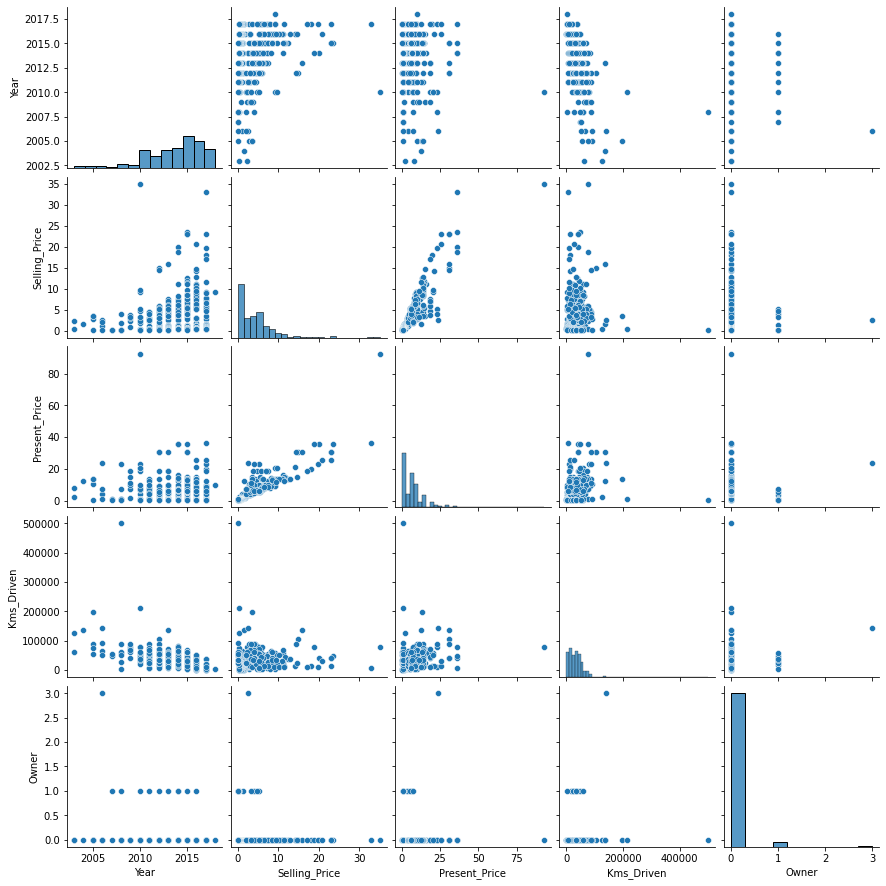

In [37]:
sns.pairplot(data)

In [38]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Data consists of temporal data hence it has to be handled

In [39]:
data['Current_year'] = 2022 

In [40]:
data['no_of_years'] = data['Current_year'] - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


the total number of years the car has been used is calculated successfully.

Hence delete the other year columns

In [41]:
data.drop(['Year', 'Current_year'], inplace = True, axis =1)
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


Handle the Categorical Features

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   no_of_years    301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
# drop cars name that is not an important feature
data.drop('Car_Name', inplace = True, axis = 1)

In [51]:
data = pd.get_dummies(data, drop_first = True )

Hence all the features are handled

In [52]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


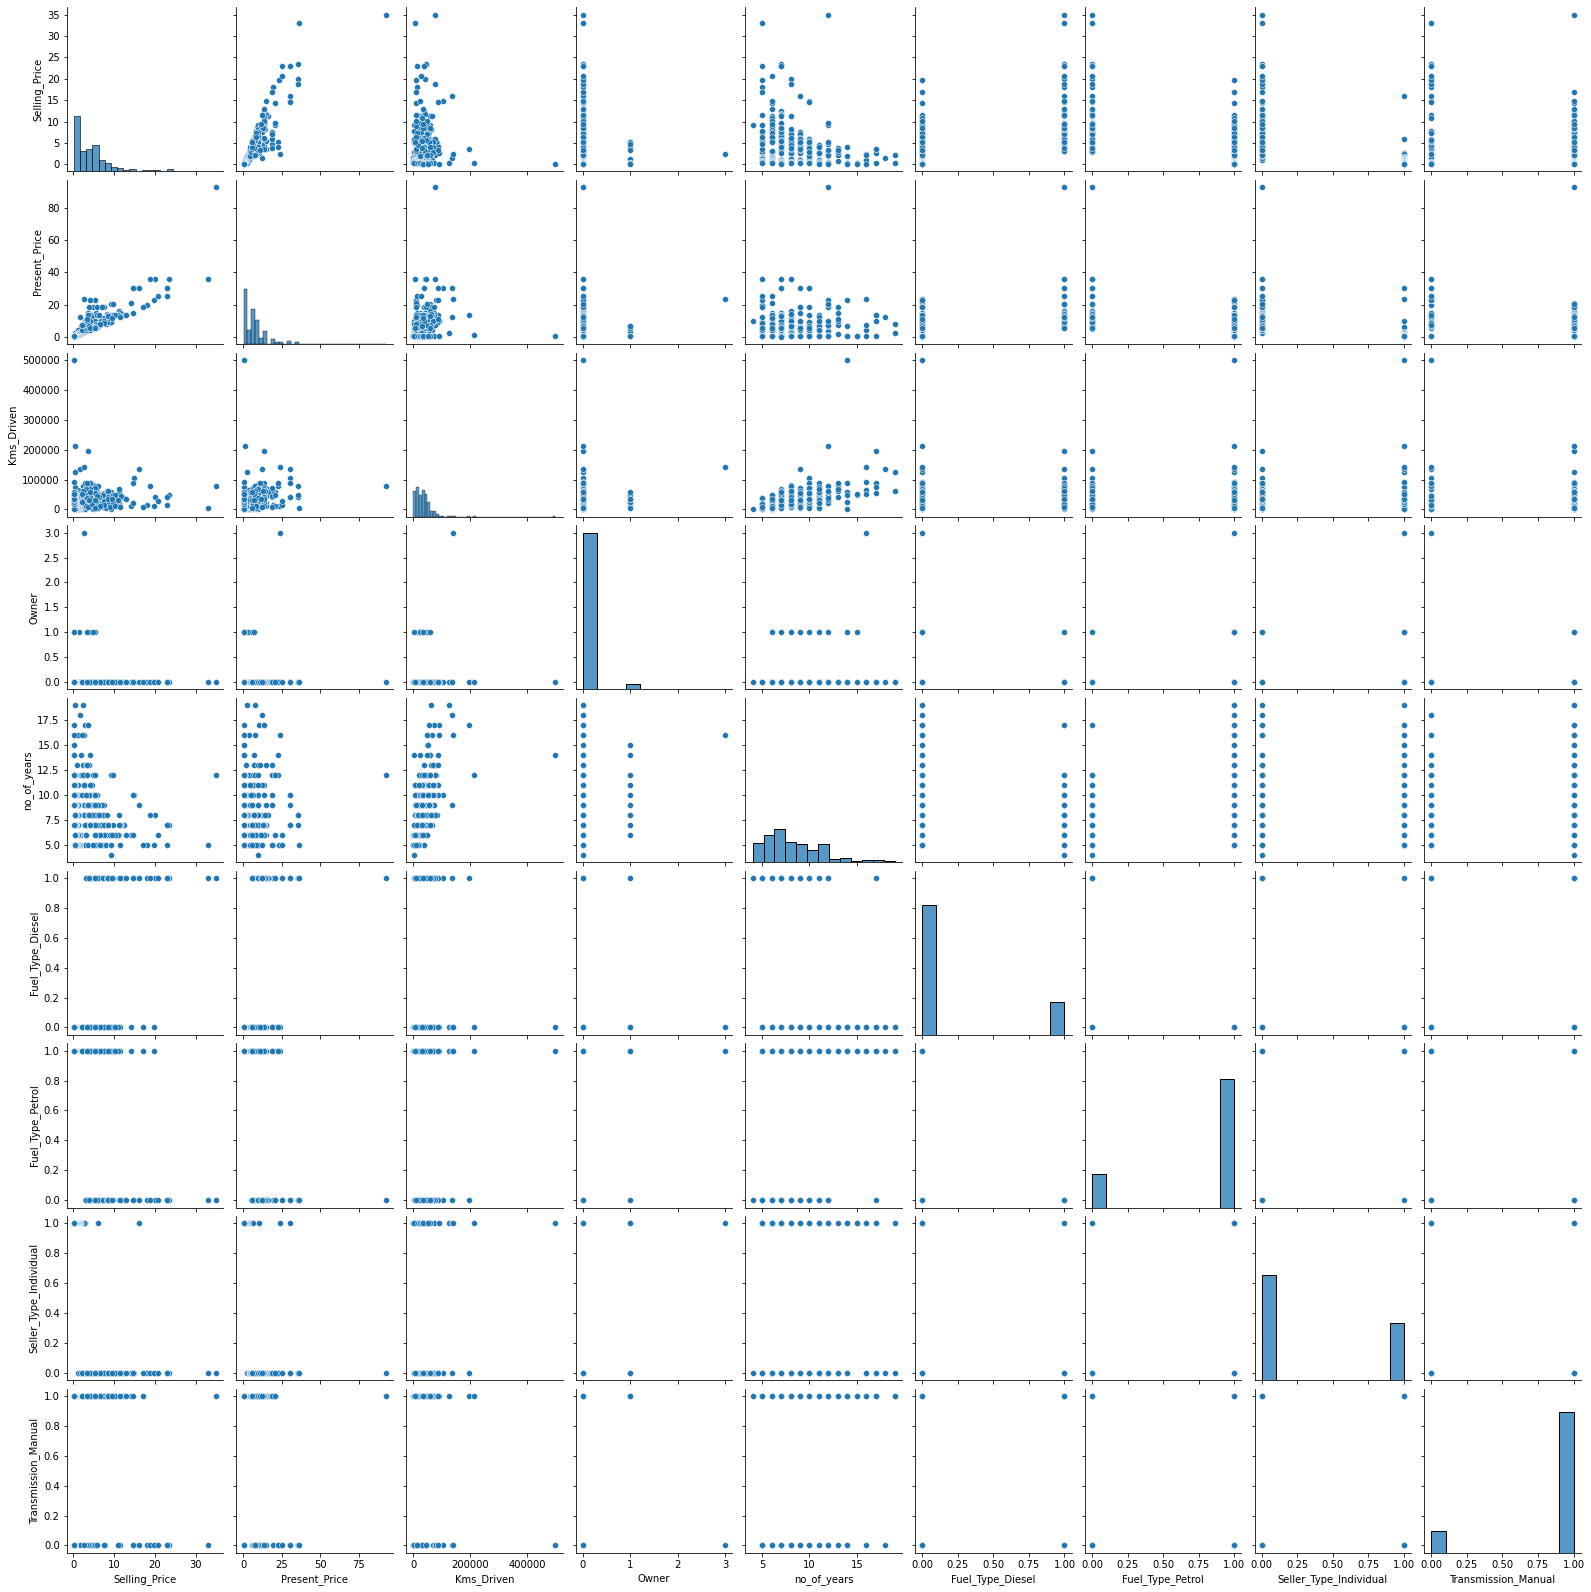

In [55]:
sns.pairplot(data)

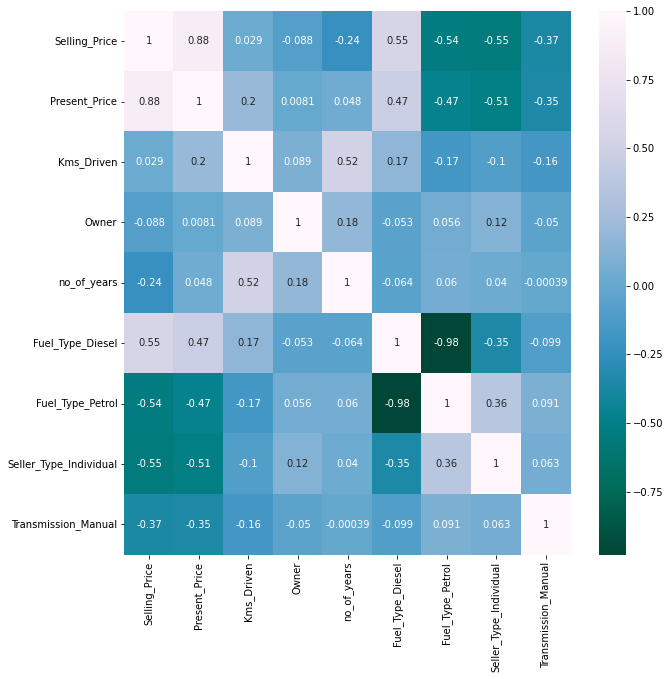

In [59]:
# from IPython.core.pylabtools import figsize
# sns.heatmap(data.corr())
plt.figure(figsize = (10,10))
g = sns.heatmap(data.corr(),annot=True, cmap = 'PuBuGn_r')


Present price highly defines the selling price

partition of independent and dependent features

In [60]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [75]:
data.shape

(301, 9)

In [81]:
X = data.iloc[:, 1: ]
X.head()

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [82]:
X.shape

(301, 8)

In [67]:
y = data['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [71]:
X.shape

(300, 9)

In [72]:
y.shape

(301,)

Train Test split

In [68]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)


Build model

In [86]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [88]:
predictions = linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


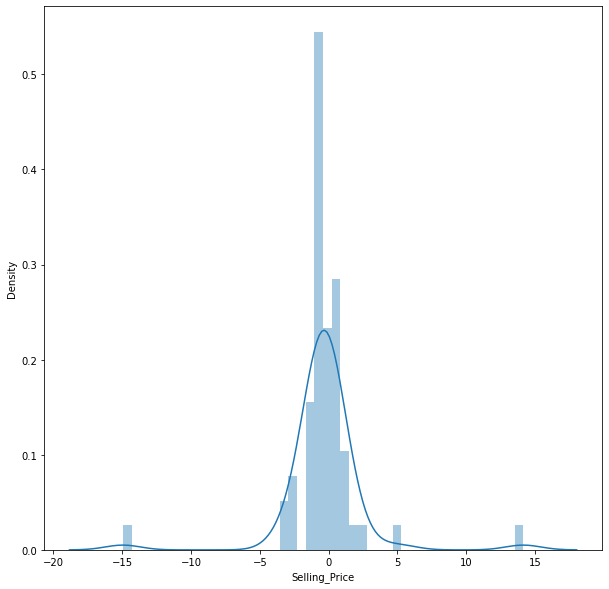

In [95]:
sns.distplot(y_test -  predictions)

In [98]:
r2_score = linear.score(X_test,y_test)
print(r2_score)

0.6524407055082917


Accuracy is very low of about 65%

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfr =RandomForestRegressor()
rfr.fit(X,y)


RandomForestRegressor()

In [104]:
prediction = rfr.predict(X_test)

In [105]:
rfr.score(X_test, y_test)

0.9697198105745876

Using the RandomForestRegressor the accuracy is 96% 

In [107]:
rf_random = RandomForestRegressor()

In [108]:
import numpy as np
n_estimators =[int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [111]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [112]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [113]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [120]:
pred = rf_random.predict(X_test)
# rf_random.score(pred, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


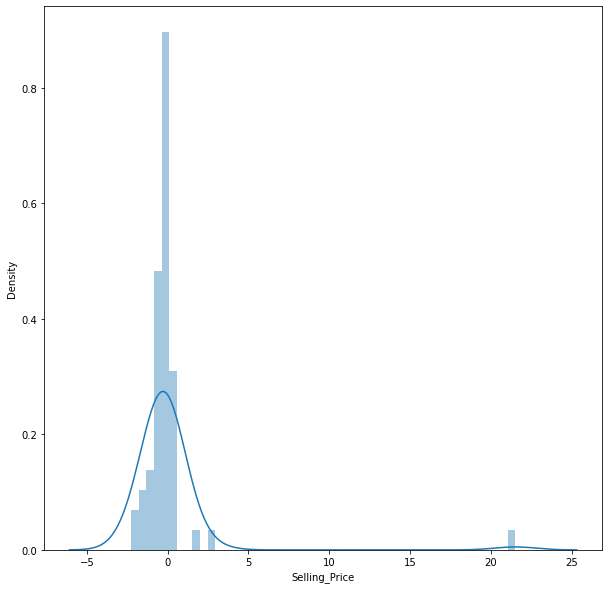

In [122]:
sns.distplot( y_test - pred)

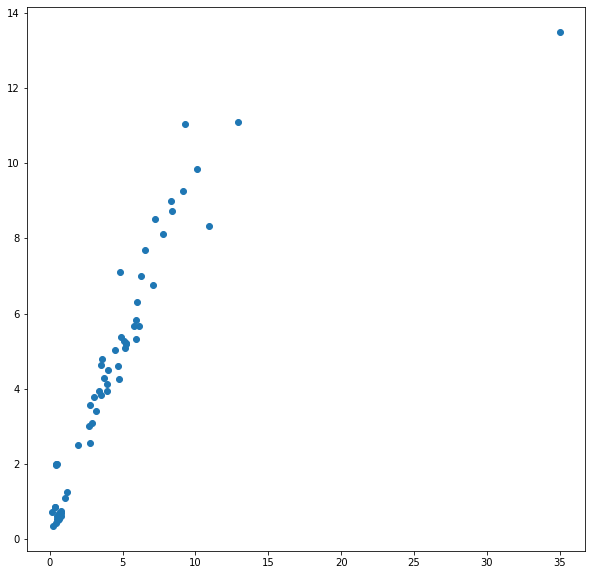

In [123]:
plt.scatter(y_test,pred)

In [124]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 0.8709880327868867
Mean Squared Error: 8.195671637401668
Root Mean Squared Error: 2.8628083480040485
